# Install Stride

Documentation: https://open-bus-stride-api.hasadna.org.il/docs#/

In [1]:
# !pip install open-bus-stride-client

In [2]:
# !pip install --upgrade open-bus-stride-client

# Test1: plot siri_vehicle_locations on a map

## Imports & Functions

In [3]:
import pandas as pd
import stride
import matplotlib.pyplot as plt

import datetime
from dateutil import tz

import gmaps

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 1000

%matplotlib inline

In [4]:
# !jupyter nbextension enable --py gmaps
# !jupyter nbextension enable --py widgetsnbextension

In [5]:
gmaps.configure(api_key='************************')

In [6]:
def localize_dates(data, dt_columns = []):
    data = data.copy()
    
    for c in dt_columns:
        data[c] = pd.to_datetime(data[c]).dt.tz_convert('Israel')
    
    return data

## get data

In [7]:
dt = datetime.datetime(2022,3, 18, tzinfo=tz.gettz('Israel'))
dt_str = str(dt.date())

In [8]:
display(pd.DataFrame(stride.get('/gtfs_routes/list', {'route_short_name':15,
                                                            'agency_name': 'אגד',
                                                            'route_long_name_contains': 'ירושלים',
                                              'date_from': dt_str,
                                              'date_to': dt_str})))


display(pd.DataFrame(stride.get('/gtfs_routes/list', {'route_short_name':19,
                                                            'agency_name': 'אגד',
                                                            'route_long_name_contains': 'ירושלים',
                                              'date_from': dt_str,
                                              'date_to': dt_str})))

,id,date,line_ref,operator_ref,route_short_name,route_long_name,route_mkt,route_direction,route_alternative,agency_name,route_type
0,27269,2022-03-18,12405,3,15,תחנה תפעולית/ביטוח לאומי-ירושלים<->האומן/ברעם-ירושלים-1#,59015,1,#,אגד,3
1,27270,2022-03-18,12406,3,15,האומן/ברעם-ירושלים<->שדרות יצחק רבין/נתנאל לורך-ירושלים-2#,59015,2,#,אגד,3


,id,date,line_ref,operator_ref,route_short_name,route_long_name,route_mkt,route_direction,route_alternative,agency_name,route_type
0,26837,2022-03-18,10802,3,19,כניסה ראשית/הדסה עין כרם-ירושלים<->מסוף הר הצופים/מרטין בובר-ירושלים-1א,15019,1,א,אגד,3
1,26838,2022-03-18,10804,3,19,מסוף הר הצופים/בנימין מזר-ירושלים<->כניסה ראשית/הדסה עין כרם-ירושלים-2#,15019,2,#,אגד,3
2,26839,2022-03-18,10806,3,19,מסוף אגד/צביה ויצחק-ירושלים<->כניסה ראשית/הדסה עין כרם-ירושלים-2ב,15019,2,ב,אגד,3


In [9]:
siri_vehicle_locations_15 = pd.DataFrame(stride.iterate('/siri_vehicle_locations/list', {
    'siri_routes__line_ref': '12406',
    'siri_rides__schedualed_start_time_from': dt,
    'siri_rides__schedualed_start_time_to': dt+datetime.timedelta(days=1),
    'order_by': 'recorded_at_time desc'
}, limit=1000000))

display(siri_vehicle_locations_15.shape)


siri_vehicle_locations_19 = pd.DataFrame(stride.iterate('/siri_vehicle_locations/list', {
    'siri_routes__line_ref': '10802',
    'siri_rides__schedualed_start_time_from': dt,
    'siri_rides__schedualed_start_time_to': dt+datetime.timedelta(days=1),
    'order_by': 'recorded_at_time desc'
}, limit=1000000))

display(siri_vehicle_locations_19.shape)



siri_vehicle_locations = siri_vehicle_locations_15.append(siri_vehicle_locations_19)

display(siri_vehicle_locations.shape)

siri_vehicle_locations.head()

(2168, 22)

(2707, 22)

(4875, 22)

,id,siri_snapshot_id,siri_ride_stop_id,recorded_at_time,lon,lat,bearing,velocity,distance_from_journey_start,distance_from_siri_ride_stop_meters,siri_snapshot__snapshot_id,siri_route__id,siri_route__line_ref,siri_route__operator_ref,siri_ride__id,siri_ride__journey_ref,siri_ride__scheduled_start_time,siri_ride__vehicle_ref,siri_ride__first_vehicle_location_id,siri_ride__last_vehicle_location_id,siri_ride__duration_minutes,siri_ride__gtfs_ride_id
0,100511354,32626,48714207,2022-03-18T14:41:03+00:00,35.21199,31.744764,210,0,8707,4867.0,2022/03/18/14/42,1080,12406,3,1904879,2022-03-18-37317044,2022-03-18T13:30:00+00:00,7813169,99341924,100511354,74,441196.0
1,100452051,32605,48714207,2022-03-18T14:37:07+00:00,35.21199,31.744764,210,0,8707,4867.0,2022/03/18/14/38,1080,12406,3,1904879,2022-03-18-37317044,2022-03-18T13:30:00+00:00,7813169,99341924,100511354,74,441196.0
2,100406543,32589,48714207,2022-03-18T14:34:10+00:00,35.21199,31.744764,210,0,8707,4867.0,2022/03/18/14/35,1080,12406,3,1904879,2022-03-18-37317044,2022-03-18T13:30:00+00:00,7813169,99341924,100511354,74,441196.0
3,100392511,32583,48714207,2022-03-18T14:32:32+00:00,35.21199,31.744764,210,0,8707,4867.0,2022/03/18/14/34,1080,12406,3,1904879,2022-03-18-37317044,2022-03-18T13:30:00+00:00,7813169,99341924,100511354,74,441196.0
4,100375602,32578,48714207,2022-03-18T14:32:32+00:00,35.21199,31.744764,210,0,8707,4867.0,2022/03/18/14/33,1080,12406,3,1904879,2022-03-18-37317044,2022-03-18T13:30:00+00:00,7813169,99341924,100511354,74,441196.0


In [10]:
### localize dates

dt_columns = ['recorded_at_time','siri_ride__scheduled_start_time']

siri_vehicle_locations = localize_dates(siri_vehicle_locations, dt_columns)

siri_vehicle_locations.head()

,id,siri_snapshot_id,siri_ride_stop_id,recorded_at_time,lon,lat,bearing,velocity,distance_from_journey_start,distance_from_siri_ride_stop_meters,siri_snapshot__snapshot_id,siri_route__id,siri_route__line_ref,siri_route__operator_ref,siri_ride__id,siri_ride__journey_ref,siri_ride__scheduled_start_time,siri_ride__vehicle_ref,siri_ride__first_vehicle_location_id,siri_ride__last_vehicle_location_id,siri_ride__duration_minutes,siri_ride__gtfs_ride_id
0,100511354,32626,48714207,2022-03-18 16:41:03+02:00,35.21199,31.744764,210,0,8707,4867.0,2022/03/18/14/42,1080,12406,3,1904879,2022-03-18-37317044,2022-03-18 15:30:00+02:00,7813169,99341924,100511354,74,441196.0
1,100452051,32605,48714207,2022-03-18 16:37:07+02:00,35.21199,31.744764,210,0,8707,4867.0,2022/03/18/14/38,1080,12406,3,1904879,2022-03-18-37317044,2022-03-18 15:30:00+02:00,7813169,99341924,100511354,74,441196.0
2,100406543,32589,48714207,2022-03-18 16:34:10+02:00,35.21199,31.744764,210,0,8707,4867.0,2022/03/18/14/35,1080,12406,3,1904879,2022-03-18-37317044,2022-03-18 15:30:00+02:00,7813169,99341924,100511354,74,441196.0
3,100392511,32583,48714207,2022-03-18 16:32:32+02:00,35.21199,31.744764,210,0,8707,4867.0,2022/03/18/14/34,1080,12406,3,1904879,2022-03-18-37317044,2022-03-18 15:30:00+02:00,7813169,99341924,100511354,74,441196.0
4,100375602,32578,48714207,2022-03-18 16:32:32+02:00,35.21199,31.744764,210,0,8707,4867.0,2022/03/18/14/33,1080,12406,3,1904879,2022-03-18-37317044,2022-03-18 15:30:00+02:00,7813169,99341924,100511354,74,441196.0


## plot

In [11]:
siri_vehicle_locations.siri_route__line_ref.groupby(
        siri_vehicle_locations.siri_ride__scheduled_start_time.dt.time).value_counts().sort_index().unstack().head(12)

siri_route__line_ref,10802,12406
siri_ride__scheduled_start_time,,
00:00:00,NaN,28.0
00:10:00,49.0,NaN
00:20:00,NaN,13.0
00:30:00,43.0,NaN
01:00:00,50.0,NaN
01:31:00,49.0,NaN
01:56:00,44.0,NaN
05:30:00,39.0,27.0
05:45:00,NaN,26.0


In [12]:
### filter data for ploting
data2plot = siri_vehicle_locations[siri_vehicle_locations.siri_ride__scheduled_start_time.dt.time.astype(str)=='05:30:00'
                                  ][['siri_ride__scheduled_start_time', 'siri_route__line_ref',
                                     'id','recorded_at_time','lat','lon']]

### reset column names
data2plot.rename(columns={'siri_ride__scheduled_start_time': 'scheduled_start_time',
                          'siri_route__line_ref': 'line_ref'}, inplace=True)

### get locations (lat,lon)
locations = data2plot.apply(lambda x: (x.lat, x.lon), axis=1)

### generate location information data
info_box_template = """
<dl>
<dt>ID</dt><dd>{id}</dd>
<dt>LineRef</dt><dd>{line_ref}</dd>
<dt>ScheduledStartTime</dt><dd>{scheduled_start_time}</dd>
<dt>RecordedAtTime</dt><dd>{recorded_at_time}</dd>
</dl>
"""

data2plot_lst = []

for i in data2plot.index:
    d = {}
    for c in data2plot.columns:
        d[c] = data2plot[c].loc[i]
        
    data2plot_lst.append(d)

info = [info_box_template.format(**pt) for pt in data2plot_lst]

### plot
marker_layer = gmaps.marker_layer(locations, info_box_content=info)
fig = gmaps.figure()
fig.add_layer(marker_layer)

# heatmap_layer = gmaps.heatmap_layer(locations)
# fig.add_layer(heatmap_layer)

fig

Figure(layout=FigureLayout(height='420px'))

# Test2: SIRI raw data vs Stride siri_vehicle_locations

## Imports & Functions

In [13]:
import pandas as pd
import brotli
import urllib.request

def extract_siri(yyyy, mm, dd, HH, MM,
                base_path = "https://openbus-stride-public.s3.eu-west-1.amazonaws.com/stride-siri-requester"):
    
    ### get and extract br file
    file_path = f"{base_path}/{yyyy}/{mm}/{dd}/{HH}/{MM}.br"
    print(file_path)
    with urllib.request.urlopen(file_path) as response:
        siri_points = eval(brotli.decompress(response.read())
                        )['Siri']['ServiceDelivery']['StopMonitoringDelivery'][0]['MonitoredStopVisit']
    
    ### set result df
    siri_df = pd.DataFrame(columns=['RecordedAtTime','LineRef','OperatorRef',
                                   'OriginAimedDepartureTime','Longitude','Latitude',
                                   'VehicleRef'])
    
    for i,j in enumerate(siri_points):
        siri_df.loc[i] = None
        siri_df.loc[i]['RecordedAtTime'] = siri_points[i]['RecordedAtTime']
        siri_df.loc[i]['LineRef'] = siri_points[i]['MonitoredVehicleJourney']['LineRef']
        siri_df.loc[i]['OperatorRef'] = siri_points[i]['MonitoredVehicleJourney']['OperatorRef']
        siri_df.loc[i]['OriginAimedDepartureTime'] = siri_points[i]['MonitoredVehicleJourney']['OriginAimedDepartureTime']
        siri_df.loc[i]['VehicleRef'] = siri_points[i]['MonitoredVehicleJourney']['VehicleRef']
        
        if 'VehicleLocation' in siri_points[i]['MonitoredVehicleJourney']:
            siri_df.loc[i]['Longitude'] = siri_points[i]['MonitoredVehicleJourney']['VehicleLocation']['Longitude']
            siri_df.loc[i]['Latitude'] = siri_points[i]['MonitoredVehicleJourney']['VehicleLocation']['Latitude']
    
    ### set dtypes
    siri_df['RecordedAtTime'] = pd.to_datetime(siri_df['RecordedAtTime']).dt.tz_convert('Israel')
    siri_df['LineRef'] = siri_df['LineRef'].astype(int)
    siri_df['OperatorRef'] = siri_df['OperatorRef'].astype(int)
    siri_df['OriginAimedDepartureTime'] = pd.to_datetime(siri_df['OriginAimedDepartureTime']).dt.tz_convert('Israel')
    siri_df['Longitude'] = siri_df['Longitude'].astype(float)
    siri_df['Latitude'] = siri_df['Latitude'].astype(float)
    
    
    return siri_df

## Get raw data

In [14]:
yyyy = "2022"
mm = "04"
dd = "14"
hour = "09"
minutes = ["00","01","02","03","04","05"]

for i in minutes:
    
    res = extract_siri(yyyy, mm, dd, hour, i)
    res['file'] = f"{yyyy}/{mm}/{dd}/{hour}/{i}"
    
    if minutes.index(i) == 0:
        siri_source = res.copy()
    else:
        siri_source = siri_source.append(res)

    display(siri_source.shape)

siri_source.head()

https://openbus-stride-public.s3.eu-west-1.amazonaws.com/stride-siri-requester/2022/04/14/09/00.br


(5084, 8)

https://openbus-stride-public.s3.eu-west-1.amazonaws.com/stride-siri-requester/2022/04/14/09/01.br


(10256, 8)

https://openbus-stride-public.s3.eu-west-1.amazonaws.com/stride-siri-requester/2022/04/14/09/02.br


(15427, 8)

https://openbus-stride-public.s3.eu-west-1.amazonaws.com/stride-siri-requester/2022/04/14/09/03.br


(20548, 8)

https://openbus-stride-public.s3.eu-west-1.amazonaws.com/stride-siri-requester/2022/04/14/09/04.br


(25604, 8)

https://openbus-stride-public.s3.eu-west-1.amazonaws.com/stride-siri-requester/2022/04/14/09/05.br


(30603, 8)

,RecordedAtTime,LineRef,OperatorRef,OriginAimedDepartureTime,Longitude,Latitude,VehicleRef,file
0,2022-04-14 11:59:39+03:00,3916,3,2022-04-14 11:30:00+03:00,35.048725,32.766769,7704369,2022/04/14/09/00
1,2022-04-14 11:59:36+03:00,3918,3,2022-04-14 11:15:00+03:00,35.026424,32.778793,7789069,2022/04/14/09/00
2,2022-04-14 11:59:31+03:00,3918,3,2022-04-14 11:45:00+03:00,35.046074,32.760738,7723769,2022/04/14/09/00
3,2022-04-14 11:59:35+03:00,10298,3,2022-04-14 11:45:00+03:00,34.727573,31.647406,8886401,2022/04/14/09/00
4,2022-04-14 11:59:37+03:00,10295,15,2022-04-14 10:30:00+03:00,34.593292,31.423051,77400202,2022/04/14/09/00


In [15]:
siri_source.OperatorRef.value_counts().head()

3     8484
5     4021
18    3487
15    2793
25    2052
Name: OperatorRef, dtype: int64

In [16]:
pd.to_datetime(siri_source.RecordedAtTime).dt.time.value_counts().head(10)

12:00:00    1150
11:55:00     588
12:02:37     299
12:02:38     263
12:00:38     260
11:59:38     259
11:59:37     247
12:02:36     246
12:03:36     244
12:03:37     243
Name: RecordedAtTime, dtype: int64

## Compare with Stride data

In [17]:
siri_vehicle_locations = pd.DataFrame(stride.iterate('/siri_vehicle_locations/list', {
    'recorded_at_time_from': datetime.datetime(int(yyyy),int(mm), int(dd), int(hour), int(minutes[0]),
                                                                                   tzinfo=tz.gettz('UTC')),
    'recorded_at_time_to': datetime.datetime(int(yyyy),int(mm), int(dd), int(hour), int(minutes[len(minutes)-1])+1,
                                                                                    tzinfo=tz.gettz('UTC'))
}, limit=100000))

display(siri_vehicle_locations.shape)

siri_vehicle_locations.head()

(31410, 22)

,id,siri_snapshot_id,siri_ride_stop_id,recorded_at_time,lon,lat,bearing,velocity,distance_from_journey_start,distance_from_siri_ride_stop_meters,siri_snapshot__snapshot_id,siri_route__id,siri_route__line_ref,siri_route__operator_ref,siri_ride__id,siri_ride__journey_ref,siri_ride__scheduled_start_time,siri_ride__vehicle_ref,siri_ride__first_vehicle_location_id,siri_ride__last_vehicle_location_id,siri_ride__duration_minutes,siri_ride__gtfs_ride_id
0,252934168,82487,122852930,2022-04-14T09:00:35+00:00,35.050468,32.763882,202,32,11295,16.0,2022/04/14/09/01,1,3916,3,4809932,2022-04-14-16153305,2022-04-14T08:30:00+00:00,7704369,252783045,252999811,45,5077708.0
1,252934169,82487,122852931,2022-04-14T09:00:40+00:00,35.023163,32.782009,284,44,0,NaN,2022/04/14/09/01,1,3916,3,4812918,2022-04-14-9832116,2022-04-14T09:00:00+00:00,7723569,252934169,253252540,61,5077709.0
2,252934170,82487,122852932,2022-04-14T09:00:33+00:00,35.023861,32.780495,282,14,18801,83.0,2022/04/14/09/01,2,3918,3,4808392,2022-04-14-10015338,2022-04-14T08:15:00+00:00,7789069,252709213,252969506,54,5069399.0
3,252934171,82487,122852933,2022-04-14T09:00:38+00:00,35.047249,32.762596,18,25,7052,67.0,2022/04/14/09/01,2,3918,3,4810802,2022-04-14-10382494,2022-04-14T08:45:00+00:00,7723769,252837167,253156752,64,5067780.0
4,252934172,82487,122850738,2022-04-14T09:00:40+00:00,34.709671,31.645548,250,90,10908,1967.0,2022/04/14/09/01,3990,10298,3,4810803,2022-04-14-12479321,2022-04-14T08:45:00+00:00,8886401,252837168,253130028,59,5107396.0


In [18]:
### localize dates

dt_columns = ['recorded_at_time','siri_ride__scheduled_start_time']

siri_vehicle_locations = localize_dates(siri_vehicle_locations, dt_columns)

siri_vehicle_locations.head()

,id,siri_snapshot_id,siri_ride_stop_id,recorded_at_time,lon,lat,bearing,velocity,distance_from_journey_start,distance_from_siri_ride_stop_meters,siri_snapshot__snapshot_id,siri_route__id,siri_route__line_ref,siri_route__operator_ref,siri_ride__id,siri_ride__journey_ref,siri_ride__scheduled_start_time,siri_ride__vehicle_ref,siri_ride__first_vehicle_location_id,siri_ride__last_vehicle_location_id,siri_ride__duration_minutes,siri_ride__gtfs_ride_id
0,252934168,82487,122852930,2022-04-14 12:00:35+03:00,35.050468,32.763882,202,32,11295,16.0,2022/04/14/09/01,1,3916,3,4809932,2022-04-14-16153305,2022-04-14 11:30:00+03:00,7704369,252783045,252999811,45,5077708.0
1,252934169,82487,122852931,2022-04-14 12:00:40+03:00,35.023163,32.782009,284,44,0,NaN,2022/04/14/09/01,1,3916,3,4812918,2022-04-14-9832116,2022-04-14 12:00:00+03:00,7723569,252934169,253252540,61,5077709.0
2,252934170,82487,122852932,2022-04-14 12:00:33+03:00,35.023861,32.780495,282,14,18801,83.0,2022/04/14/09/01,2,3918,3,4808392,2022-04-14-10015338,2022-04-14 11:15:00+03:00,7789069,252709213,252969506,54,5069399.0
3,252934171,82487,122852933,2022-04-14 12:00:38+03:00,35.047249,32.762596,18,25,7052,67.0,2022/04/14/09/01,2,3918,3,4810802,2022-04-14-10382494,2022-04-14 11:45:00+03:00,7723769,252837167,253156752,64,5067780.0
4,252934172,82487,122850738,2022-04-14 12:00:40+03:00,34.709671,31.645548,250,90,10908,1967.0,2022/04/14/09/01,3990,10298,3,4810803,2022-04-14-12479321,2022-04-14 11:45:00+03:00,8886401,252837168,253130028,59,5107396.0


In [19]:
siri_vehicle_locations_key_cols = ['recorded_at_time','siri_route__line_ref',
                                    'siri_route__operator_ref','siri_ride__scheduled_start_time',
                                   'lon','lat','siri_ride__vehicle_ref','siri_snapshot__snapshot_id']

siri_source_key_cols = siri_source.columns.tolist()

merged = siri_source[(siri_source.RecordedAtTime.dt.time.astype(str).between('12:00:00','12:06:00'))  
                    ].drop_duplicates(subset=siri_source_key_cols
                                     ).merge(siri_vehicle_locations, how = 'left', 
                 left_on=siri_source_key_cols,
                 right_on=siri_vehicle_locations_key_cols)


display(siri_source.drop_duplicates(subset=siri_source_key_cols).shape,
        siri_source[(siri_source.RecordedAtTime.dt.time.astype(str).between('12:00:00','12:06:00'))
                    ].drop_duplicates(subset=siri_source_key_cols).shape,
        merged.drop_duplicates(siri_source_key_cols).shape,
        merged.drop_duplicates().shape,
        merged.shape)


merged.head()

(30519, 8)

(24391, 8)

(24391, 30)

(24461, 30)

(24461, 30)

,RecordedAtTime,LineRef,OperatorRef,OriginAimedDepartureTime,Longitude,Latitude,VehicleRef,file,id,siri_snapshot_id,siri_ride_stop_id,recorded_at_time,lon,lat,bearing,velocity,distance_from_journey_start,distance_from_siri_ride_stop_meters,siri_snapshot__snapshot_id,siri_route__id,siri_route__line_ref,siri_route__operator_ref,siri_ride__id,siri_ride__journey_ref,siri_ride__scheduled_start_time,siri_ride__vehicle_ref,siri_ride__first_vehicle_location_id,siri_ride__last_vehicle_location_id,siri_ride__duration_minutes,siri_ride__gtfs_ride_id
0,2022-04-14 12:00:35+03:00,3916,3,2022-04-14 11:30:00+03:00,35.050468,32.763882,7704369,2022/04/14/09/01,252934168.0,82487.0,122852930.0,2022-04-14 12:00:35+03:00,35.050468,32.763882,202.0,32.0,11295.0,16.0,2022/04/14/09/01,1.0,3916.0,3.0,4809932.0,2022-04-14-16153305,2022-04-14 11:30:00+03:00,7704369,252783045.0,252999811.0,45.0,5077708.0
1,2022-04-14 12:00:40+03:00,3916,3,2022-04-14 12:00:00+03:00,35.023163,32.782009,7723569,2022/04/14/09/01,252934169.0,82487.0,122852931.0,2022-04-14 12:00:40+03:00,35.023163,32.782009,284.0,44.0,0.0,NaN,2022/04/14/09/01,1.0,3916.0,3.0,4812918.0,2022-04-14-9832116,2022-04-14 12:00:00+03:00,7723569,252934169.0,253252540.0,61.0,5077709.0
2,2022-04-14 12:00:33+03:00,3918,3,2022-04-14 11:15:00+03:00,35.023861,32.780495,7789069,2022/04/14/09/01,252934170.0,82487.0,122852932.0,2022-04-14 12:00:33+03:00,35.023861,32.780495,282.0,14.0,18801.0,83.0,2022/04/14/09/01,2.0,3918.0,3.0,4808392.0,2022-04-14-10015338,2022-04-14 11:15:00+03:00,7789069,252709213.0,252969506.0,54.0,5069399.0
3,2022-04-14 12:00:38+03:00,3918,3,2022-04-14 11:45:00+03:00,35.047249,32.762596,7723769,2022/04/14/09/01,252934171.0,82487.0,122852933.0,2022-04-14 12:00:38+03:00,35.047249,32.762596,18.0,25.0,7052.0,67.0,2022/04/14/09/01,2.0,3918.0,3.0,4810802.0,2022-04-14-10382494,2022-04-14 11:45:00+03:00,7723769,252837167.0,253156752.0,64.0,5067780.0
4,2022-04-14 12:00:40+03:00,10298,3,2022-04-14 11:45:00+03:00,34.709671,31.645548,8886401,2022/04/14/09/01,252934172.0,82487.0,122850738.0,2022-04-14 12:00:40+03:00,34.709671,31.645548,250.0,90.0,10908.0,1967.0,2022/04/14/09/01,3990.0,10298.0,3.0,4810803.0,2022-04-14-12479321,2022-04-14 11:45:00+03:00,8886401,252837168.0,253130028.0,59.0,5107396.0


In [20]:
round(merged.drop_duplicates(subset=siri_source_key_cols).lon.notnull().mean(),3)

0.979

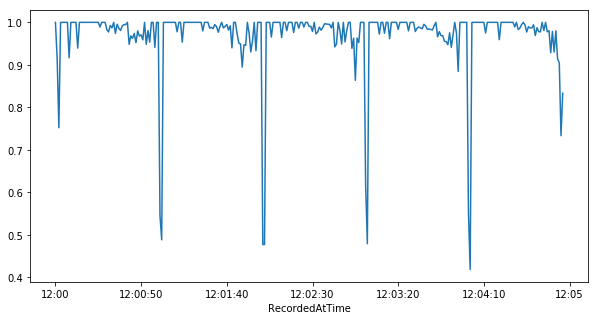

In [21]:
merged.drop_duplicates(siri_source_key_cols).lon.notnull().groupby(
            merged.drop_duplicates(subset=siri_source_key_cols).RecordedAtTime.dt.time).mean(
            ).plot(figsize=(10,5))

In [22]:
merged.drop_duplicates(siri_source_key_cols).lon.notnull().groupby(
            [merged.drop_duplicates(subset=siri_source_key_cols).RecordedAtTime.dt.hour,
            merged.drop_duplicates(subset=siri_source_key_cols).RecordedAtTime.dt.minute]).agg(['count','mean']
            ).round(3)

count   mean
RecordedAtTime RecordedAtTime              
12             0                5990  0.982
               1                4896  0.979
               2                4769  0.978
               3                4611  0.978
               4                4125  0.976

In [23]:
merged.drop_duplicates(siri_source_key_cols).lon.notnull().groupby(
            merged.drop_duplicates(subset=siri_source_key_cols).OperatorRef).agg(['count','mean']
            ).round(3).sort_values(by='count', ascending=False)

,count,mean
OperatorRef,,
3,6936,0.995
5,2978,0.993
18,2829,1.000
15,2223,1.000
25,1617,1.000
16,1594,1.000
14,957,0.990
31,821,1.000
32,650,1.000


In [24]:
merged[(merged.recorded_at_time.isnull())].OriginAimedDepartureTime.dt.time.value_counts().sort_index()

08:59:00     5
09:28:00     5
09:32:00     3
09:48:00    10
09:50:00     5
10:03:00     5
10:15:00    10
10:18:00     5
10:37:00     5
10:42:00    15
10:45:00     5
10:48:00    10
10:50:00    15
10:55:00     5
10:57:00     5
11:02:00     5
11:03:00     5
11:04:59     5
11:06:00     5
11:07:00    15
11:12:00     5
11:13:00     3
11:15:00     5
11:17:00     5
11:17:59     4
11:18:00     5
11:20:00     6
11:21:00     5
11:23:14     5
11:25:00     5
11:27:00    10
11:29:44     5
11:30:00     3
11:31:00     5
11:32:00    10
11:33:00    10
11:36:00     1
11:36:15     5
11:37:00    10
11:37:43     3
11:39:00     5
11:40:00    21
11:41:00    10
11:42:00    10
11:44:55     5
11:45:00     5
11:45:52     5
11:46:00    10
11:47:00     5
11:48:00    15
11:48:49     5
11:49:00    10
11:49:30     5
11:50:00    20
11:51:00     7
11:53:00     5
11:54:00     5
11:55:00     5
11:56:00    10
11:57:00     5
11:57:25     5
11:59:00    10
11:59:33     5
12:00:00    10
12:01:00     4
12:02:00     3
12:02:44  

**The overall match rate between SIRI source and the DB is 98% (large operators match rate is even higher)**

## Missing Rows Deep Dive

In [25]:
merged[(merged.recorded_at_time.isnull())&(
    merged.OriginAimedDepartureTime.dt.time.astype(str)=='11:41:00')].sort_values(by=['LineRef',
                                                                                      'RecordedAtTime'])

,RecordedAtTime,LineRef,OperatorRef,OriginAimedDepartureTime,Longitude,Latitude,VehicleRef,file,id,siri_snapshot_id,siri_ride_stop_id,recorded_at_time,lon,lat,bearing,velocity,distance_from_journey_start,distance_from_siri_ride_stop_meters,siri_snapshot__snapshot_id,siri_route__id,siri_route__line_ref,siri_route__operator_ref,siri_ride__id,siri_ride__journey_ref,siri_ride__scheduled_start_time,siri_ride__vehicle_ref,siri_ride__first_vehicle_location_id,siri_ride__last_vehicle_location_id,siri_ride__duration_minutes,siri_ride__gtfs_ride_id
1815,2022-04-14 12:00:13+03:00,2974,3,2022-04-14 11:41:00+03:00,34.771492,31.815269,7763669,2022/04/14/09/01,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
6599,2022-04-14 12:01:11+03:00,2974,3,2022-04-14 11:41:00+03:00,34.771095,31.815252,7763669,2022/04/14/09/02,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
11583,2022-04-14 12:02:36+03:00,2974,3,2022-04-14 11:41:00+03:00,34.771450,31.816154,7763669,2022/04/14/09/03,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
16566,2022-04-14 12:03:30+03:00,2974,3,2022-04-14 11:41:00+03:00,34.774731,31.818487,7763669,2022/04/14/09/04,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
21515,2022-04-14 12:04:40+03:00,2974,3,2022-04-14 11:41:00+03:00,34.775620,31.820726,7763669,2022/04/14/09/05,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1916,2022-04-14 12:00:45+03:00,29246,91,2022-04-14 11:41:00+03:00,34.745441,32.017395,8703126,2022/04/14/09/01,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
6709,2022-04-14 12:01:57+03:00,29246,91,2022-04-14 11:41:00+03:00,34.747719,32.016590,8703126,2022/04/14/09/02,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
11697,2022-04-14 12:02:56+03:00,29246,91,2022-04-14 11:41:00+03:00,34.747379,32.012444,8703126,2022/04/14/09/03,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
16680,2022-04-14 12:03:52+03:00,29246,91,2022-04-14 11:41:00+03:00,34.750046,32.012291,8703126,2022/04/14/09/04,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
21629,2022-04-14 12:04:40+03:00,29246,91,2022-04-14 11:41:00+03:00,34.752792,32.013870,8703126,2022/04/14/09/05,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [26]:
merged[(merged.LineRef==2974)].sort_values(by=['OriginAimedDepartureTime', 'RecordedAtTime'])

,RecordedAtTime,LineRef,OperatorRef,OriginAimedDepartureTime,Longitude,Latitude,VehicleRef,file,id,siri_snapshot_id,siri_ride_stop_id,recorded_at_time,lon,lat,bearing,velocity,distance_from_journey_start,distance_from_siri_ride_stop_meters,siri_snapshot__snapshot_id,siri_route__id,siri_route__line_ref,siri_route__operator_ref,siri_ride__id,siri_ride__journey_ref,siri_ride__scheduled_start_time,siri_ride__vehicle_ref,siri_ride__first_vehicle_location_id,siri_ride__last_vehicle_location_id,siri_ride__duration_minutes,siri_ride__gtfs_ride_id
1815,2022-04-14 12:00:13+03:00,2974,3,2022-04-14 11:41:00+03:00,34.771492,31.815269,7763669,2022/04/14/09/01,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
6599,2022-04-14 12:01:11+03:00,2974,3,2022-04-14 11:41:00+03:00,34.771095,31.815252,7763669,2022/04/14/09/02,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
11583,2022-04-14 12:02:36+03:00,2974,3,2022-04-14 11:41:00+03:00,34.771450,31.816154,7763669,2022/04/14/09/03,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
16566,2022-04-14 12:03:30+03:00,2974,3,2022-04-14 11:41:00+03:00,34.774731,31.818487,7763669,2022/04/14/09/04,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
21515,2022-04-14 12:04:40+03:00,2974,3,2022-04-14 11:41:00+03:00,34.775620,31.820726,7763669,2022/04/14/09/05,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1816,2022-04-14 12:00:36+03:00,2974,3,2022-04-14 12:00:00+03:00,34.783833,31.800688,23289602,2022/04/14/09/01,252936248.0,82487.0,122853925.0,2022-04-14 12:00:36+03:00,34.783833,31.800688,23.0,29.0,201.0,181.0,2022/04/14/09/01,973.0,2974.0,3.0,4812140.0,2022-04-14-43644475,2022-04-14 12:00:00+03:00,23289602,252911122.0,253084559.0,35.0,5070283.0
6600,2022-04-14 12:01:40+03:00,2974,3,2022-04-14 12:00:00+03:00,34.787083,31.801245,23289602,2022/04/14/09/02,252941377.0,82488.0,122856486.0,2022-04-14 12:01:40+03:00,34.787083,31.801245,308.0,29.0,845.0,13.0,2022/04/14/09/02,973.0,2974.0,3.0,4812140.0,2022-04-14-43644475,2022-04-14 12:00:00+03:00,23289602,252911122.0,253084559.0,35.0,5070283.0
11584,2022-04-14 12:02:36+03:00,2974,3,2022-04-14 12:00:00+03:00,34.787285,31.803877,23289602,2022/04/14/09/03,252946481.0,82489.0,122858975.0,2022-04-14 12:02:36+03:00,34.787285,31.803877,352.0,36.0,1329.0,101.0,2022/04/14/09/03,973.0,2974.0,3.0,4812140.0,2022-04-14-43644475,2022-04-14 12:00:00+03:00,23289602,252911122.0,253084559.0,35.0,5070283.0
16567,2022-04-14 12:03:35+03:00,2974,3,2022-04-14 12:00:00+03:00,34.784889,31.805428,23289602,2022/04/14/09/04,252951525.0,82490.0,122861536.0,2022-04-14 12:03:35+03:00,34.784889,31.805428,342.0,0.0,1549.0,10.0,2022/04/14/09/04,973.0,2974.0,3.0,4812140.0,2022-04-14-43644475,2022-04-14 12:00:00+03:00,23289602,252911122.0,253084559.0,35.0,5070283.0
21516,2022-04-14 12:04:36+03:00,2974,3,2022-04-14 12:00:00+03:00,34.786331,31.807804,23289602,2022/04/14/09/05,252956507.0,82491.0,122863999.0,2022-04-14 12:04:36+03:00,34.786331,31.807804,34.0,25.0,1818.0,27.0,2022/04/14/09/05,973.0,2974.0,3.0,4812140.0,2022-04-14-43644475,2022-04-14 12:00:00+03:00,23289602,252911122.0,253084559.0,35.0,5070283.0


In [27]:
import pandas as pd
import stride
import datetime
from dateutil import tz

pd.DataFrame(stride.iterate('/siri_vehicle_locations/list', {
    'recorded_at_time_from': datetime.datetime(2022,4, 14, 9, 0, tzinfo=tz.gettz('UTC')),
    'recorded_at_time_to': datetime.datetime(2022,4, 14, 9, 6, tzinfo=tz.gettz('UTC')),
    'siri_routes__operator_ref': '3',
    'siri_routes__line_ref': '2974'
}, limit=1000))[['recorded_at_time',
                 'siri_route__line_ref',
                 'siri_route__operator_ref', 'siri_ride__scheduled_start_time','siri_ride__vehicle_ref',
                'lon','lat','siri_snapshot__snapshot_id']].sort_values(by=['siri_ride__scheduled_start_time',
                                                                          'recorded_at_time'])

,recorded_at_time,siri_route__line_ref,siri_route__operator_ref,siri_ride__scheduled_start_time,siri_ride__vehicle_ref,lon,lat,siri_snapshot__snapshot_id
0,2022-04-14T09:00:13+00:00,2974,3,2022-04-14T08:40:00+00:00,7763669,34.771492,31.815269,2022/04/14/09/01
2,2022-04-14T09:01:11+00:00,2974,3,2022-04-14T08:40:00+00:00,7763669,34.771095,31.815252,2022/04/14/09/02
4,2022-04-14T09:02:36+00:00,2974,3,2022-04-14T08:40:00+00:00,7763669,34.771450,31.816154,2022/04/14/09/03
6,2022-04-14T09:03:30+00:00,2974,3,2022-04-14T08:40:00+00:00,7763669,34.774731,31.818487,2022/04/14/09/04
8,2022-04-14T09:04:40+00:00,2974,3,2022-04-14T08:40:00+00:00,7763669,34.775620,31.820726,2022/04/14/09/05
10,2022-04-14T09:05:32+00:00,2974,3,2022-04-14T08:40:00+00:00,7763669,34.777260,31.821730,2022/04/14/09/06
1,2022-04-14T09:00:36+00:00,2974,3,2022-04-14T09:00:00+00:00,23289602,34.783833,31.800688,2022/04/14/09/01
3,2022-04-14T09:01:40+00:00,2974,3,2022-04-14T09:00:00+00:00,23289602,34.787083,31.801245,2022/04/14/09/02
5,2022-04-14T09:02:36+00:00,2974,3,2022-04-14T09:00:00+00:00,23289602,34.787285,31.803877,2022/04/14/09/03
7,2022-04-14T09:03:35+00:00,2974,3,2022-04-14T09:00:00+00:00,23289602,34.784889,31.805428,2022/04/14/09/04


**In this case the rows are not missing but the OriginAimedDepartureTime is wrong. The reason for this is that the OriginAimedDepartureTime has been changed along the ride and the DB saves only the first OriginAimedDepartureTime it encounters**

In [28]:
## missing data comprison without OriginAimedDepartureTime

siri_vehicle_locations_key_cols2 = ['recorded_at_time','siri_route__line_ref',
                                    'siri_route__operator_ref',
                                   'lon','lat','siri_ride__vehicle_ref','siri_snapshot__snapshot_id']

siri_source_key_cols2 = siri_source.drop(columns=['OriginAimedDepartureTime']).columns.tolist()

merged2 = siri_source[(siri_source.RecordedAtTime.dt.time.astype(str).between('12:00:00','12:06:00'))  
                    ].drop_duplicates(subset=siri_source_key_cols
                                     ).merge(siri_vehicle_locations, how = 'left', 
                 left_on=siri_source_key_cols2,
                 right_on=siri_vehicle_locations_key_cols2)

display(merged2.drop_duplicates(siri_source_key_cols).shape,
        merged2.drop_duplicates().shape,
        merged2.shape)

merged2.head()

(24391, 30)

(24461, 30)

(24461, 30)

,RecordedAtTime,LineRef,OperatorRef,OriginAimedDepartureTime,Longitude,Latitude,VehicleRef,file,id,siri_snapshot_id,siri_ride_stop_id,recorded_at_time,lon,lat,bearing,velocity,distance_from_journey_start,distance_from_siri_ride_stop_meters,siri_snapshot__snapshot_id,siri_route__id,siri_route__line_ref,siri_route__operator_ref,siri_ride__id,siri_ride__journey_ref,siri_ride__scheduled_start_time,siri_ride__vehicle_ref,siri_ride__first_vehicle_location_id,siri_ride__last_vehicle_location_id,siri_ride__duration_minutes,siri_ride__gtfs_ride_id
0,2022-04-14 12:00:35+03:00,3916,3,2022-04-14 11:30:00+03:00,35.050468,32.763882,7704369,2022/04/14/09/01,252934168.0,82487.0,122852930.0,2022-04-14 12:00:35+03:00,35.050468,32.763882,202.0,32.0,11295.0,16.0,2022/04/14/09/01,1.0,3916.0,3.0,4809932.0,2022-04-14-16153305,2022-04-14 11:30:00+03:00,7704369,252783045.0,252999811.0,45.0,5077708.0
1,2022-04-14 12:00:40+03:00,3916,3,2022-04-14 12:00:00+03:00,35.023163,32.782009,7723569,2022/04/14/09/01,252934169.0,82487.0,122852931.0,2022-04-14 12:00:40+03:00,35.023163,32.782009,284.0,44.0,0.0,NaN,2022/04/14/09/01,1.0,3916.0,3.0,4812918.0,2022-04-14-9832116,2022-04-14 12:00:00+03:00,7723569,252934169.0,253252540.0,61.0,5077709.0
2,2022-04-14 12:00:33+03:00,3918,3,2022-04-14 11:15:00+03:00,35.023861,32.780495,7789069,2022/04/14/09/01,252934170.0,82487.0,122852932.0,2022-04-14 12:00:33+03:00,35.023861,32.780495,282.0,14.0,18801.0,83.0,2022/04/14/09/01,2.0,3918.0,3.0,4808392.0,2022-04-14-10015338,2022-04-14 11:15:00+03:00,7789069,252709213.0,252969506.0,54.0,5069399.0
3,2022-04-14 12:00:38+03:00,3918,3,2022-04-14 11:45:00+03:00,35.047249,32.762596,7723769,2022/04/14/09/01,252934171.0,82487.0,122852933.0,2022-04-14 12:00:38+03:00,35.047249,32.762596,18.0,25.0,7052.0,67.0,2022/04/14/09/01,2.0,3918.0,3.0,4810802.0,2022-04-14-10382494,2022-04-14 11:45:00+03:00,7723769,252837167.0,253156752.0,64.0,5067780.0
4,2022-04-14 12:00:40+03:00,10298,3,2022-04-14 11:45:00+03:00,34.709671,31.645548,8886401,2022/04/14/09/01,252934172.0,82487.0,122850738.0,2022-04-14 12:00:40+03:00,34.709671,31.645548,250.0,90.0,10908.0,1967.0,2022/04/14/09/01,3990.0,10298.0,3.0,4810803.0,2022-04-14-12479321,2022-04-14 11:45:00+03:00,8886401,252837168.0,253130028.0,59.0,5107396.0


In [29]:
round(merged2.drop_duplicates(subset=siri_source_key_cols).lon.notnull().mean(),3)

0.991

In [30]:
merged2.drop_duplicates(siri_source_key_cols).lon.notnull().groupby(
            [merged.drop_duplicates(subset=siri_source_key_cols).RecordedAtTime.dt.hour,
            merged.drop_duplicates(subset=siri_source_key_cols).RecordedAtTime.dt.minute]).agg(['count','mean']
            ).round(3)

count   mean
RecordedAtTime RecordedAtTime              
12             0                5990  0.992
               1                4896  0.991
               2                4769  0.990
               3                4611  0.990
               4                4125  0.989

In [31]:
merged2.drop_duplicates(siri_source_key_cols).lon.notnull().groupby(
            merged.drop_duplicates(subset=siri_source_key_cols).OperatorRef).agg(['count','mean']
            ).round(3).sort_values(by='count', ascending=False)

,count,mean
OperatorRef,,
3,6936,1.00
5,2978,1.00
18,2829,1.00
15,2223,1.00
25,1617,1.00
16,1594,1.00
14,957,0.99
31,821,1.00
32,650,1.00


In [32]:
merged2.drop_duplicates(siri_source_key_cols).lon.isnull().groupby(
            merged.drop_duplicates(subset=siri_source_key_cols).OperatorRef).agg(['count','sum']
            ).round(3).sort_values(by='count', ascending=False)[lambda x: x['sum']>0]

,count,sum
OperatorRef,,
14,957,10.0
2,220,220.0


In [33]:
agencies = pd.DataFrame(stride.get('/gtfs_agencies/list', {}))[['operator_ref','agency_name']].drop_duplicates()

agencies[agencies.operator_ref.isin([14,2])]

,operator_ref,agency_name
29,14,נתיב אקספרס
32,2,רכבת ישראל


In [34]:
merged2[(merged2.recorded_at_time.isnull())&(
    merged2.OperatorRef==14)].sort_values(by=['LineRef','RecordedAtTime'])

,RecordedAtTime,LineRef,OperatorRef,OriginAimedDepartureTime,Longitude,Latitude,VehicleRef,file,id,siri_snapshot_id,siri_ride_stop_id,recorded_at_time,lon,lat,bearing,velocity,distance_from_journey_start,distance_from_siri_ride_stop_meters,siri_snapshot__snapshot_id,siri_route__id,siri_route__line_ref,siri_route__operator_ref,siri_ride__id,siri_ride__journey_ref,siri_ride__scheduled_start_time,siri_ride__vehicle_ref,siri_ride__first_vehicle_location_id,siri_ride__last_vehicle_location_id,siri_ride__duration_minutes,siri_ride__gtfs_ride_id
4175,2022-04-14 12:00:02+03:00,452,14,2022-04-14 11:57:00+03:00,NaN,NaN,452,2022/04/14/09/01,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
9111,2022-04-14 12:01:02+03:00,452,14,2022-04-14 11:57:00+03:00,NaN,NaN,452,2022/04/14/09/02,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
14109,2022-04-14 12:02:02+03:00,452,14,2022-04-14 11:57:00+03:00,NaN,NaN,452,2022/04/14/09/03,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
19078,2022-04-14 12:03:02+03:00,452,14,2022-04-14 11:57:00+03:00,NaN,NaN,452,2022/04/14/09/04,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
24005,2022-04-14 12:04:02+03:00,452,14,2022-04-14 11:57:00+03:00,NaN,NaN,452,2022/04/14/09/05,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4174,2022-04-14 12:00:02+03:00,453,14,2022-04-14 11:32:00+03:00,NaN,NaN,453,2022/04/14/09/01,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
9110,2022-04-14 12:01:01+03:00,453,14,2022-04-14 11:32:00+03:00,NaN,NaN,453,2022/04/14/09/02,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
14108,2022-04-14 12:02:01+03:00,453,14,2022-04-14 11:32:00+03:00,NaN,NaN,453,2022/04/14/09/03,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
19077,2022-04-14 12:03:02+03:00,453,14,2022-04-14 11:32:00+03:00,NaN,NaN,453,2022/04/14/09/04,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
24004,2022-04-14 12:04:02+03:00,453,14,2022-04-14 11:32:00+03:00,NaN,NaN,453,2022/04/14/09/05,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [35]:
import pandas as pd
import stride
import datetime
from dateutil import tz

display(pd.DataFrame(stride.iterate('/siri_vehicle_locations/list', {
    'recorded_at_time_from': datetime.datetime(2022,4, 14, 9, 0, tzinfo=tz.gettz('UTC')),
    'recorded_at_time_to': datetime.datetime(2022,4, 14, 9, 6, tzinfo=tz.gettz('UTC')),
    'siri_routes__operator_ref': '14',
    'siri_routes__line_ref': '452'
}, limit=1000))) 

display(pd.DataFrame(stride.iterate('/siri_vehicle_locations/list', {
    'recorded_at_time_from': datetime.datetime(2022,4, 14, 9, 0, tzinfo=tz.gettz('UTC')),
    'recorded_at_time_to': datetime.datetime(2022,4, 14, 9, 6, tzinfo=tz.gettz('UTC')),
    'siri_routes__operator_ref': '14',
    'siri_routes__line_ref': '453'
}, limit=1000)))  

""


""


In [36]:
merged2[merged2.Longitude.isnull()].OperatorRef.value_counts()

2     220
14     10
Name: OperatorRef, dtype: int64

**Without OriginAimedDepartureTime the overall match rate is 99% while the missing rows doesn't have Lon and Lat data in source (most of the missing rows are from the train)**